In [30]:
import pylab as plt
import pandas as pd
import numpy as np
import torch

In [2]:
results_df = pd.read_csv('../raw/LOCAL_conv_weight_results.csv')

In [3]:
iter_results_df = pd.read_csv('../raw/LOCAL_mnist_lenet_iter.csv')
iter_results_df.columns = iter_results_df.columns.str.strip()

In [4]:
iter_proc_df = iter_results_df.drop(columns=['seed']).groupby('epochs').agg([np.mean,np.std])
iter_proc_df

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_34364/52109184.py:1: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  iter_proc_df = iter_results_df.drop(columns=['seed']).groupby('epochs').agg([np.mean,np.std])


acc           train_time           test_time     
           mean       std       mean       std      mean  std
epochs                                                       
1       0.97437  0.005867  12.261104  0.189363       0.0  0.0
2       0.97635  0.002448  35.488396  6.903013       0.0  0.0
3       0.97229  0.005034  61.873547  0.403400       0.0  0.0

In [5]:
results_proc_df = results_df.drop(columns=['seed']).groupby('weight_init').agg([np.mean, np.std])
results_proc_df

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_34364/3688787180.py:1: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  results_proc_df = results_df.drop(columns=['seed']).groupby('weight_init').agg([np.mean, np.std])


acc           train_time           test_time          
                mean       std       mean       std      mean       std
weight_init                                                            
ortho_ran    0.96934  0.002420   7.064206  0.204114  0.309163  0.006246
pre_train    0.97870  0.001270   7.155561  0.232746  0.315864  0.014469
ran          0.97080  0.001545   7.136264  0.675113  0.306654  0.004647

(0.95, 0.99)

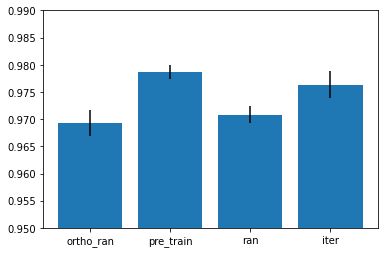

In [29]:
x = [*results_proc_df['acc']['mean'], 0.97635]
y = results_proc_df['train_time']['mean']
error = [*results_proc_df['acc']['std'], 0.002448]
labels = ['ortho_ran', 'pre_train', 'ran', 'iter']

plt.bar(labels, x, yerr=error)
plt.ylim((.95,.99))


In [40]:
l1 = torch.load('../raw/mnist_lenet_weights/213-1.pth')
l2 = torch.load('../raw/mnist_lenet_weights/213-2.pth')

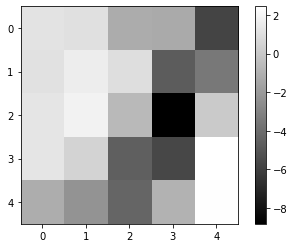

In [72]:
plt.imshow(np.squeeze(l1['weight'][2]), cmap='gray', interpolation='nearest')

plt.colorbar()